In [1]:
import fastf1.plotting
import f1analytics as f1

In [2]:
# enable some matplotlib patches for plotting timedelta values and load
# FastF1's default color scheme
fastf1.plotting.setup_mpl(color_scheme='fastf1' )

session_year = 2026
session_name = "Bahrein Grand Prix"
session_type = 'Test Day 1'


# load a session and its telemetry data
session = fastf1.get_testing_session(2026, 1, 1)
session.load()
# In this way i Can exclude the box laps
laps = session.laps

results = session.results

circuit_info = session.get_circuit_info()

weather = session.weather_data



req         WARNING 	DEFAULT CACHE ENABLED! (310.43 MB) /Users/PietroPaolo/Library/Caches/fastf1


core           INFO 	Loading data for Pre-Season Testing - Practice 1 [v3.8.1]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
core        WARNING 	No lap data for driver 6
core        WARNING 	Fixed incorrect tyre stint information for driver '11'
core        WARNING 	No lap data for driver 14
core        WARNING 	No lap data for driver 30
core        WARNING 	No lap data for driver 87
core        WARNING 	Failed to perform lap accuracy check - all laps marked as inaccurate (driver 6)
core        WARNING 	Failed to perform lap accuracy check - all laps marked as inaccurate (driver 14)
core        WARNING 	Failed to perform lap accura

In [3]:
t = f1.telemetry.Telemetry(
    session=session,
    session_name=session_name,
    year=session_year,
    session_type=session_type
)

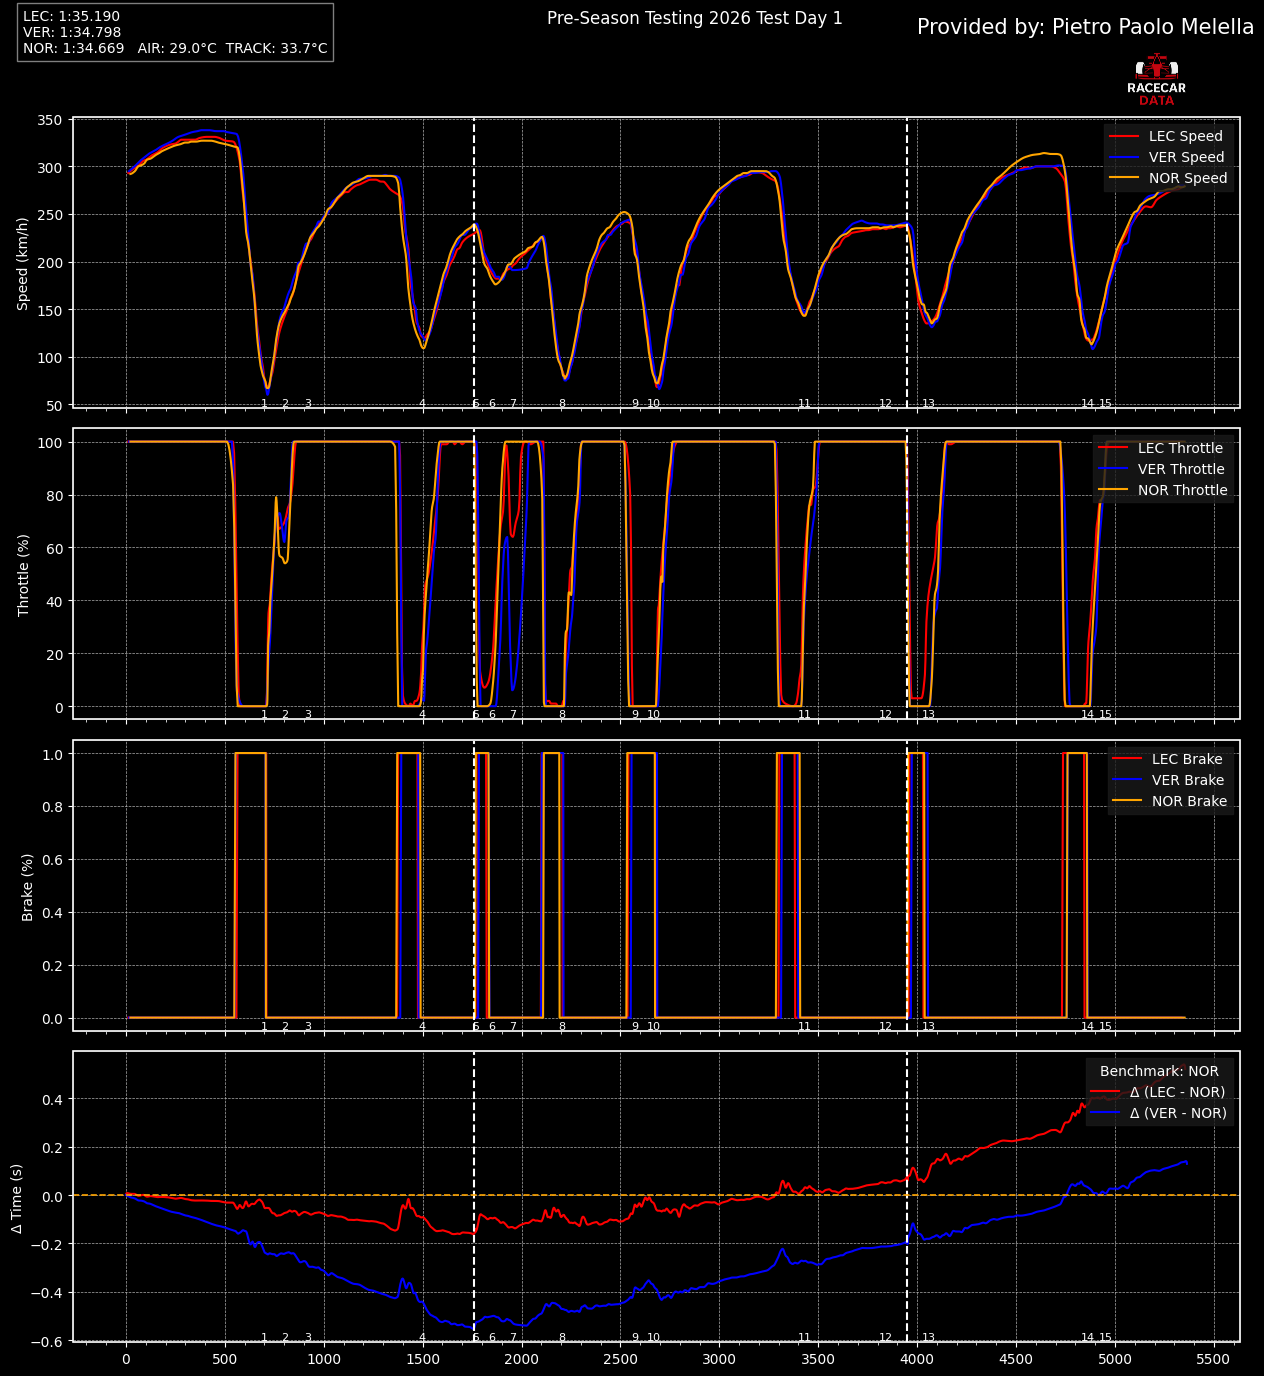

In [4]:
t.compare_laps(
    drivers={'LEC': 'fastest', 'VER': 'fastest', 'NOR': 'fastest'},
    channels=['Speed', 'Throttle', 'Brake','Delta'],
    session_label=session_type
)

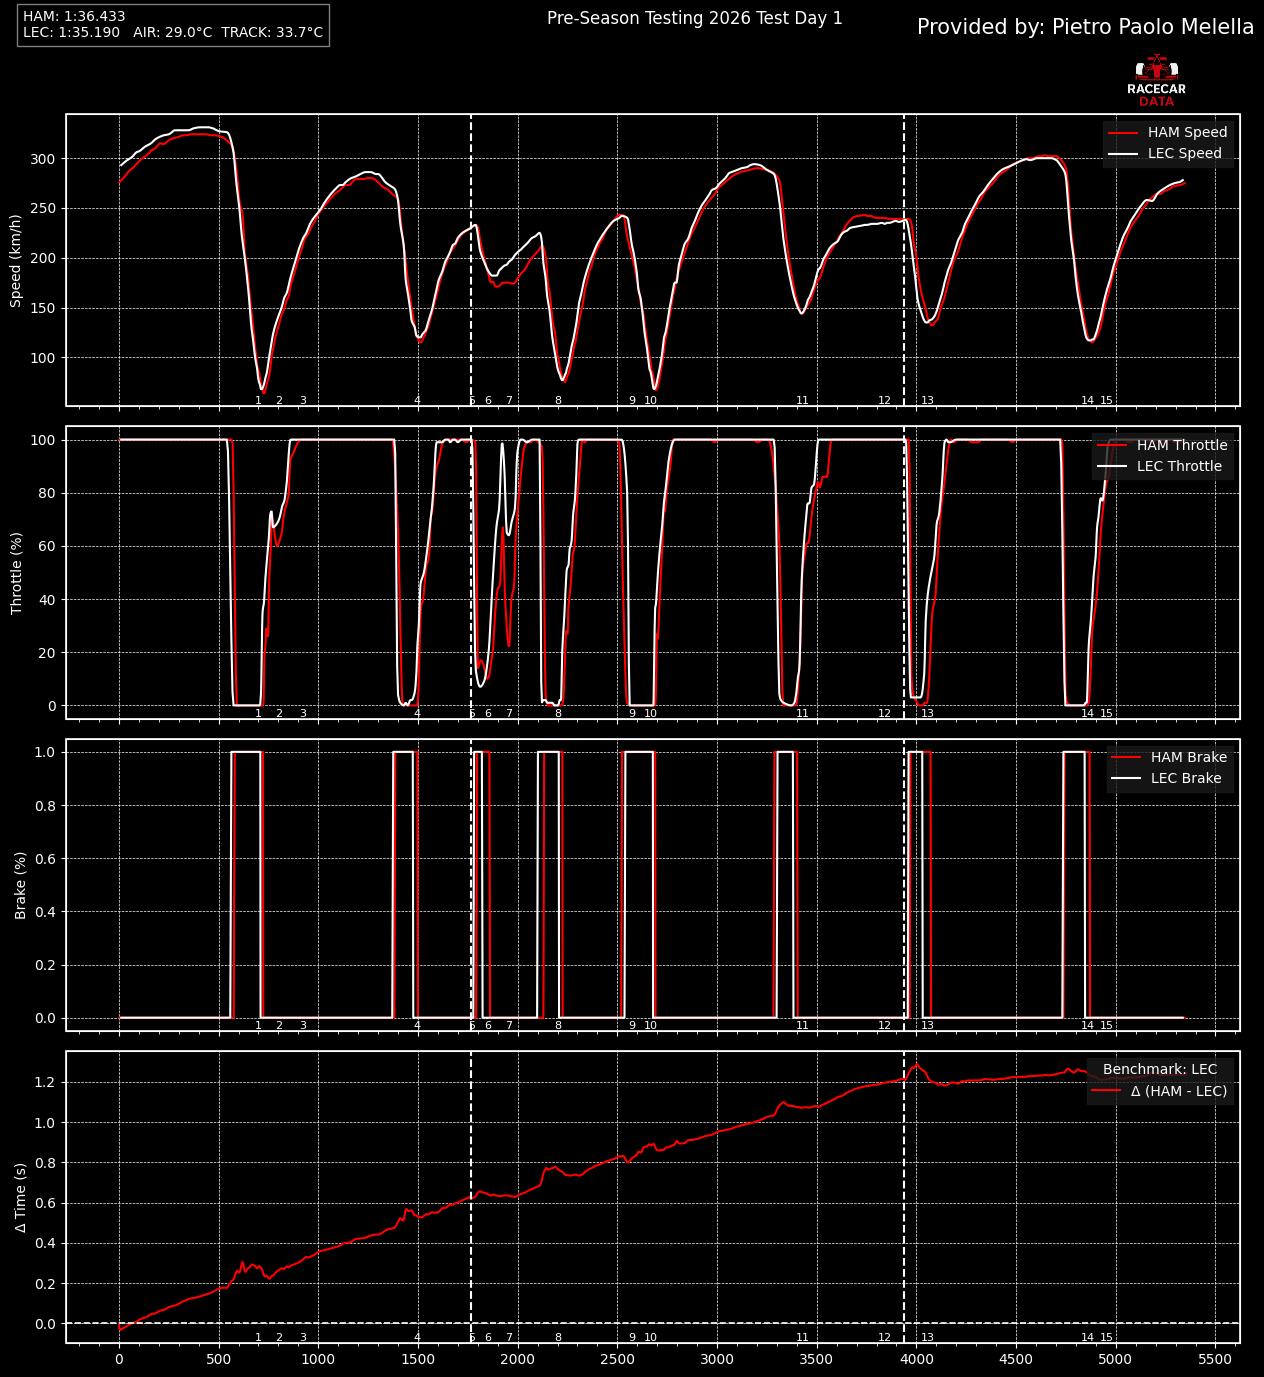

In [5]:
t.compare_laps(
    drivers={'HAM': 'fastest', 'LEC': 'fastest'},
    channels=['Speed', 'Throttle', 'Brake','Delta'],
    session_label=session_type
)

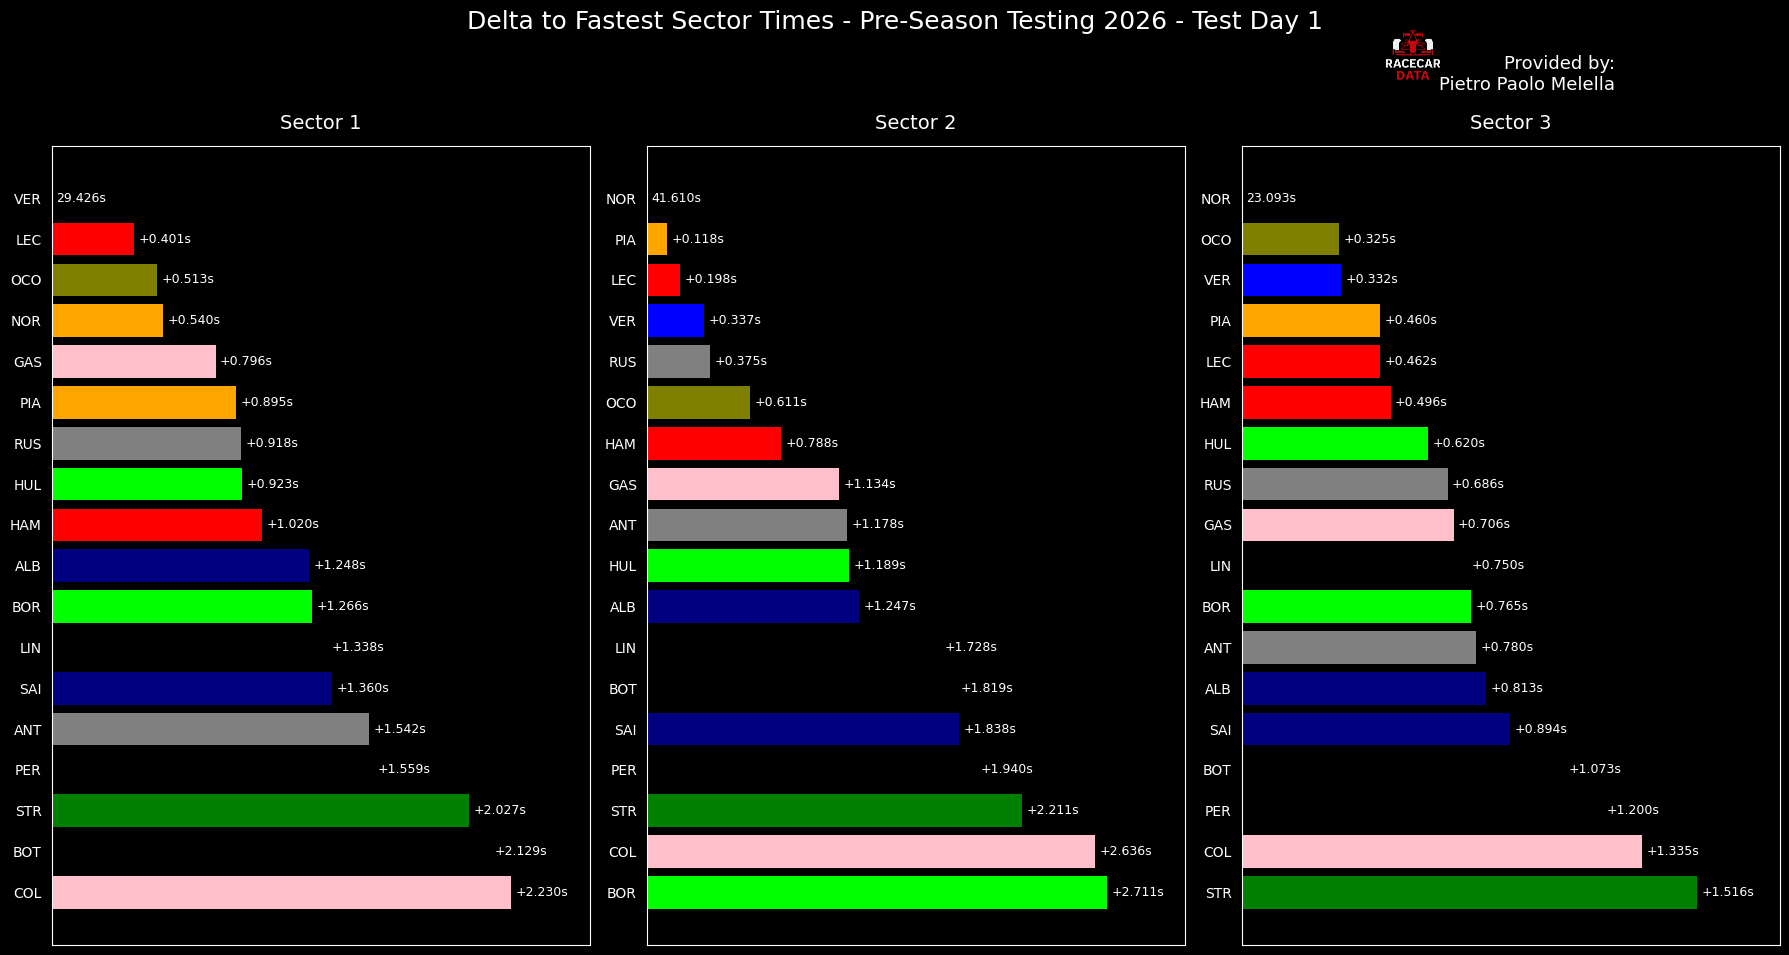

In [6]:
sd = f1.fastest_sectors_deltas.SectorDeltaPlotter(
    session, session_name, session_year, session_type
)
sd.plot()

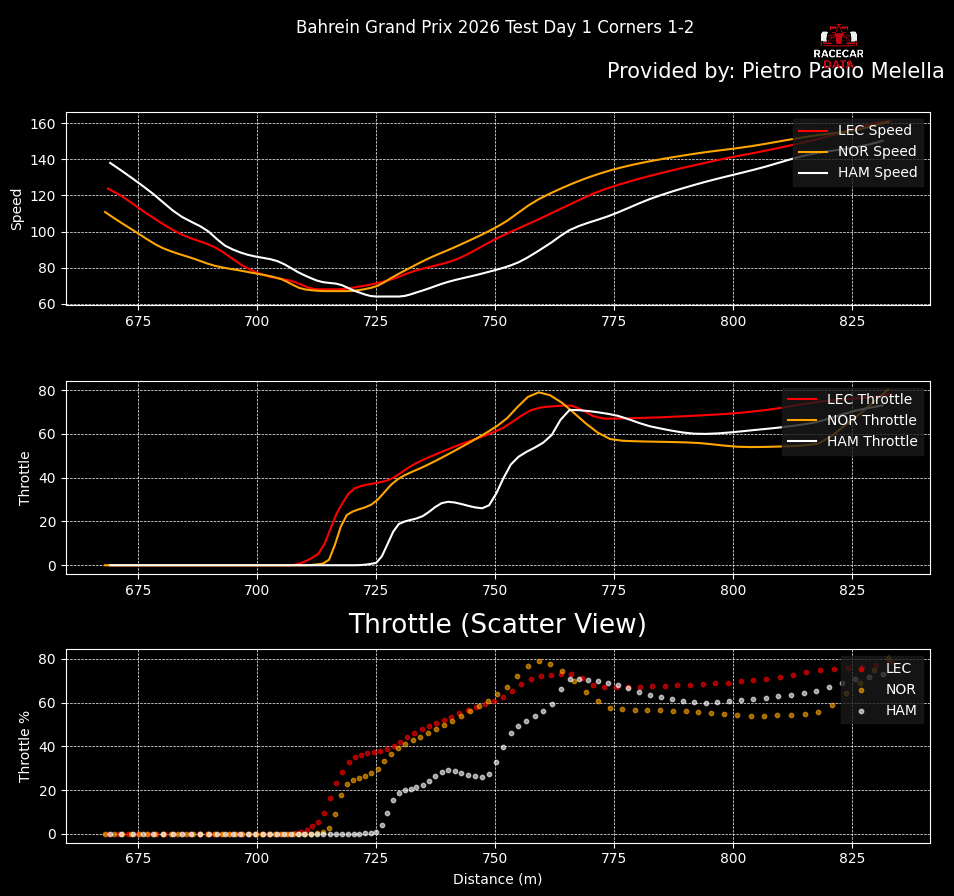

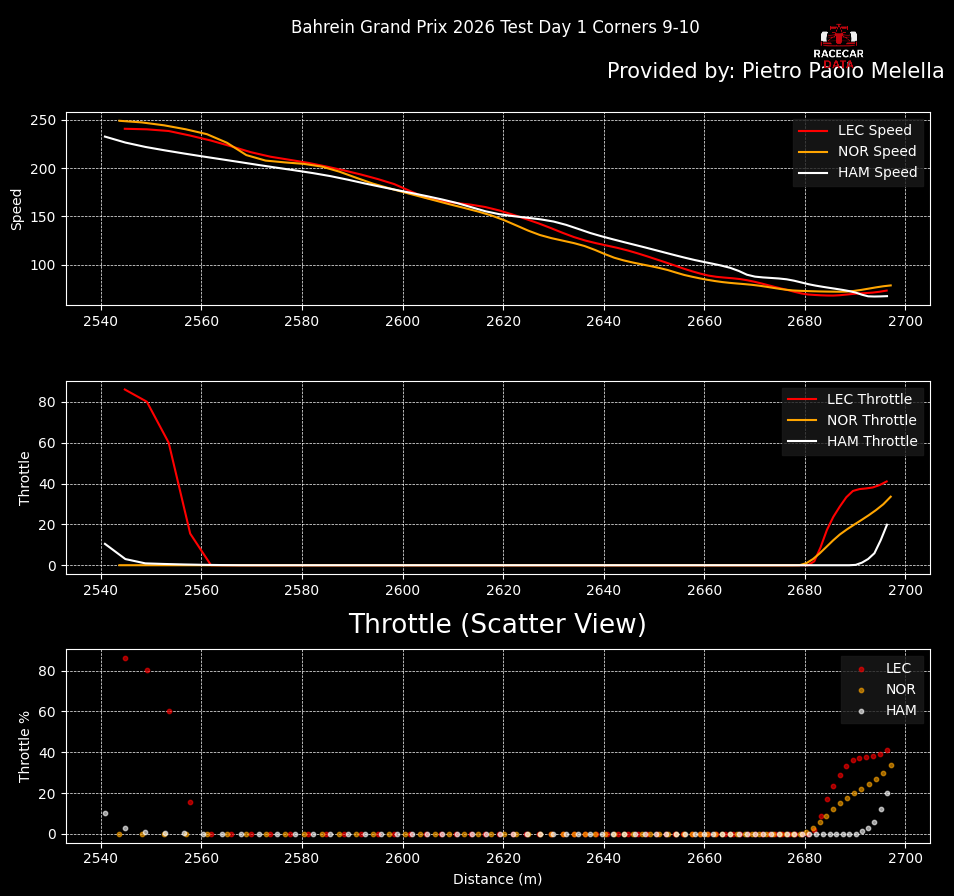

In [7]:
corners = [[1,2], [9,10]]
for corner in corners:
    ca = f1.corner_analysis.CornerAnalysis(
        session, session_name, session_year, session_type,
        drivers={'LEC': 'fastest', 'NOR': 'fastest', 'HAM': 'fastest'},
        corner_idxs=[corner], before=30, after=30
    )
    ca.plot_all(['Speed', 'Throttle' ])

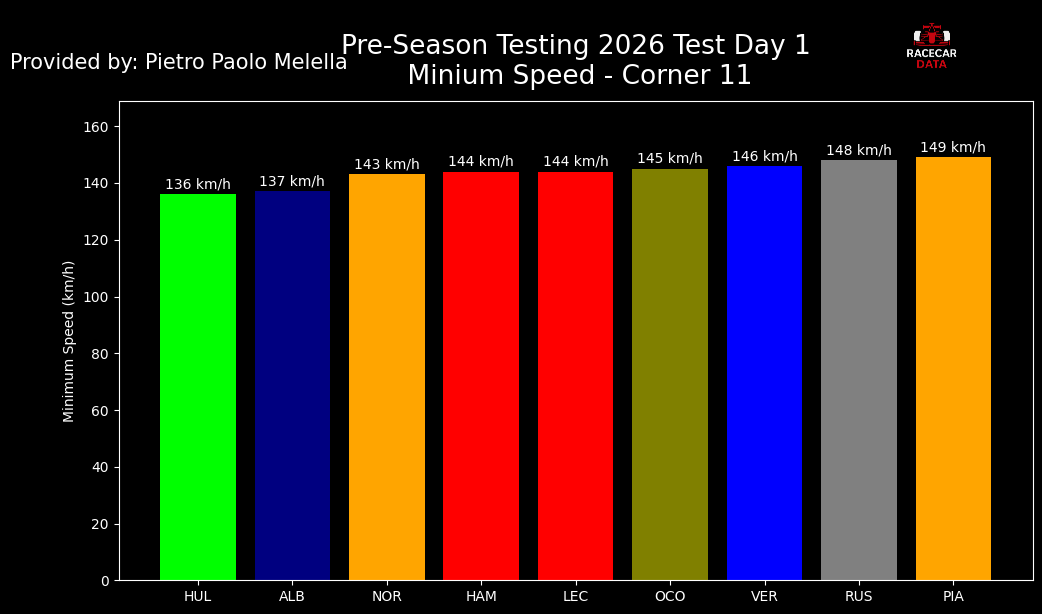

In [13]:
msc1 = f1.min_speed_corner.CornerMinSpeed(
    session, session_name, session_year, session_type,
    corner_idxs=[11], after=30, before=30, n_drivers=10
).plot()

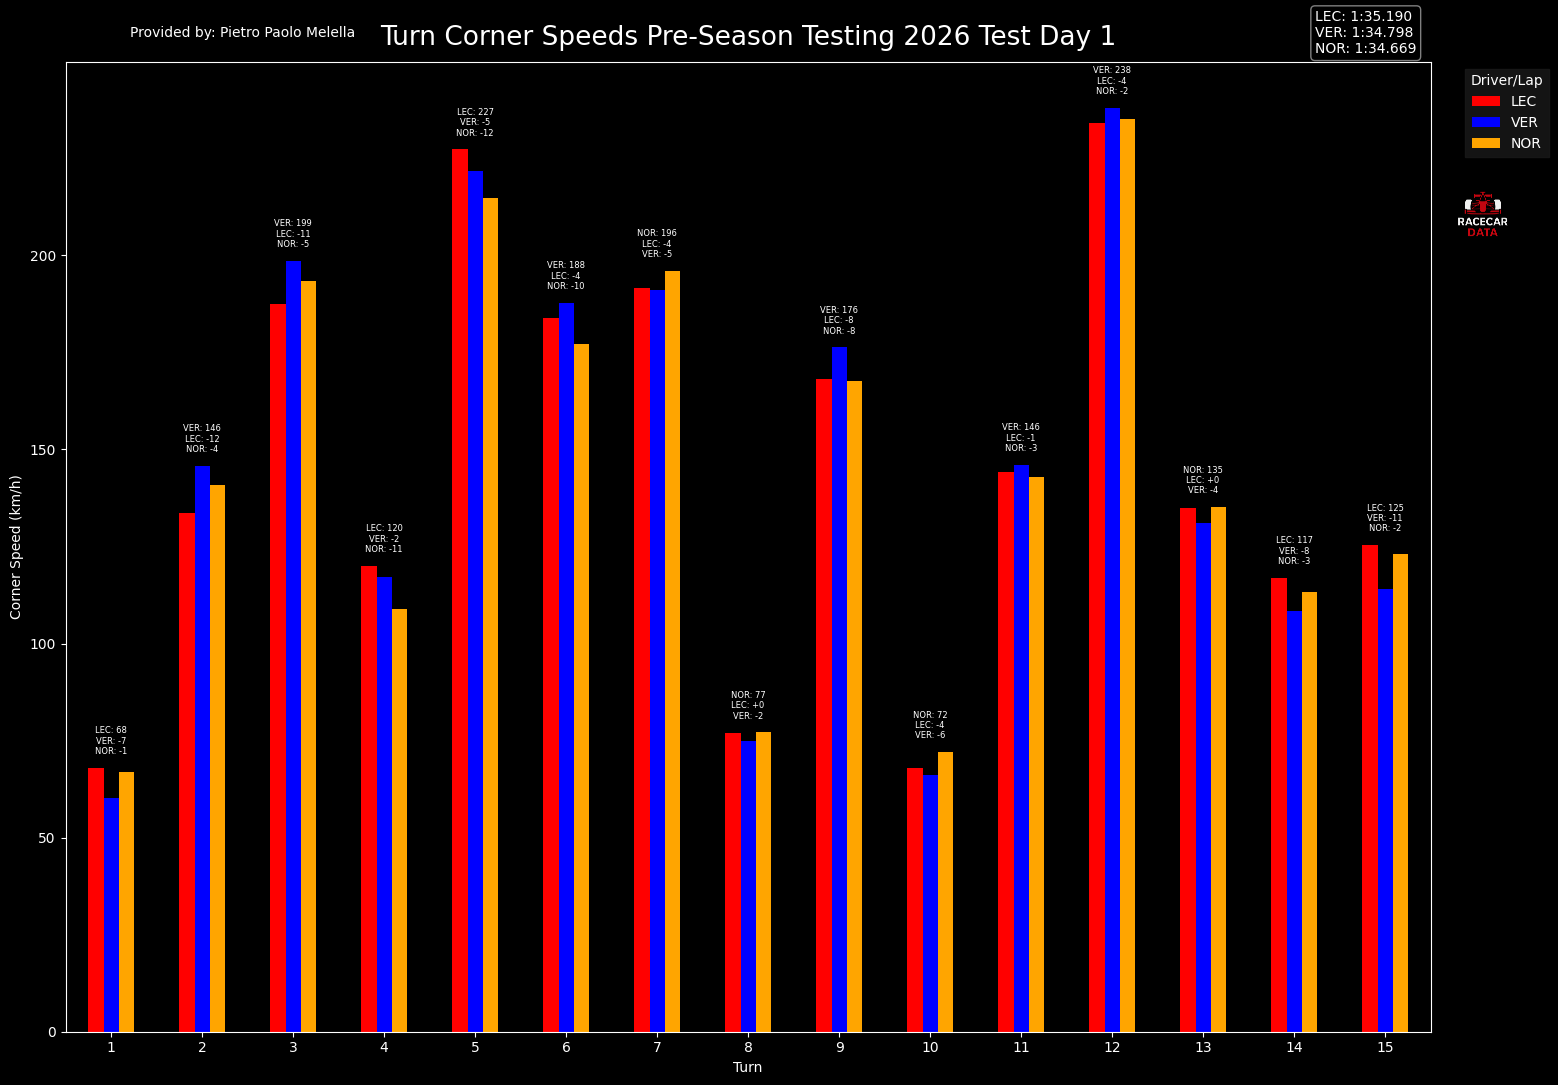

In [10]:
csc = f1.corner_speed.CornerSpeedComparator(
    drivers={'LEC': 'fastest', 'VER': 'fastest','NOR': 'fastest'},
    session=session,
    session_name=session_name,
    year=session_year,
    session_type=session_type
).plot_peak_speeds()

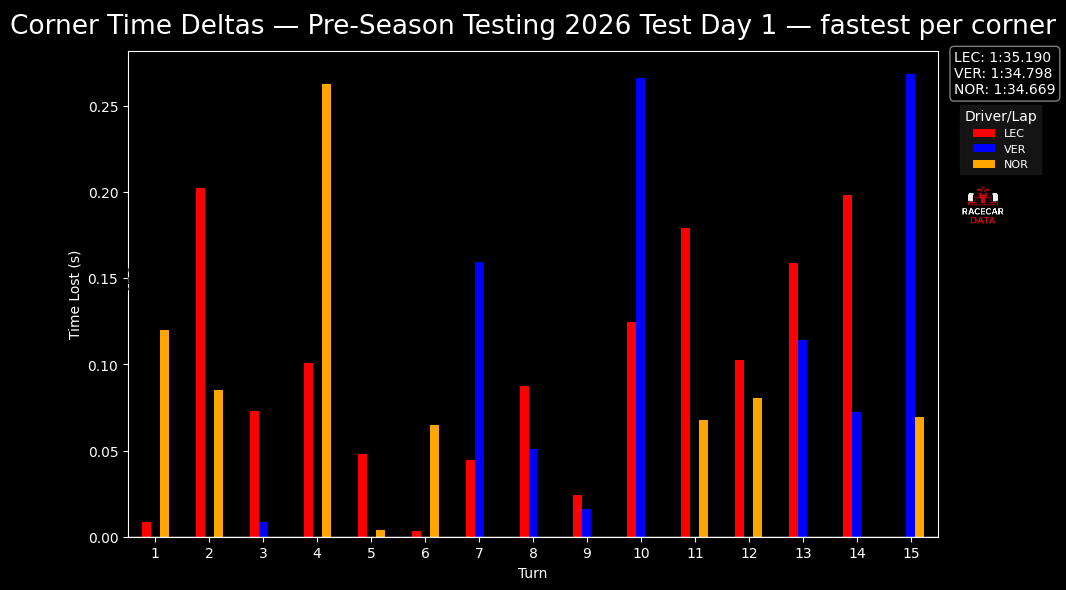

In [11]:
cmp = f1.corner_time_comparator.CornerTimeComparator(
    drivers=[('LEC','fastest'), ('VER','fastest'), ('NOR','fastest')],
    session=session,
    session_name=session_name,
    year=session_year,
    session_type=session_type
)

cmp.plot_corner_time_deltas(baseline='per_corner_fastest')

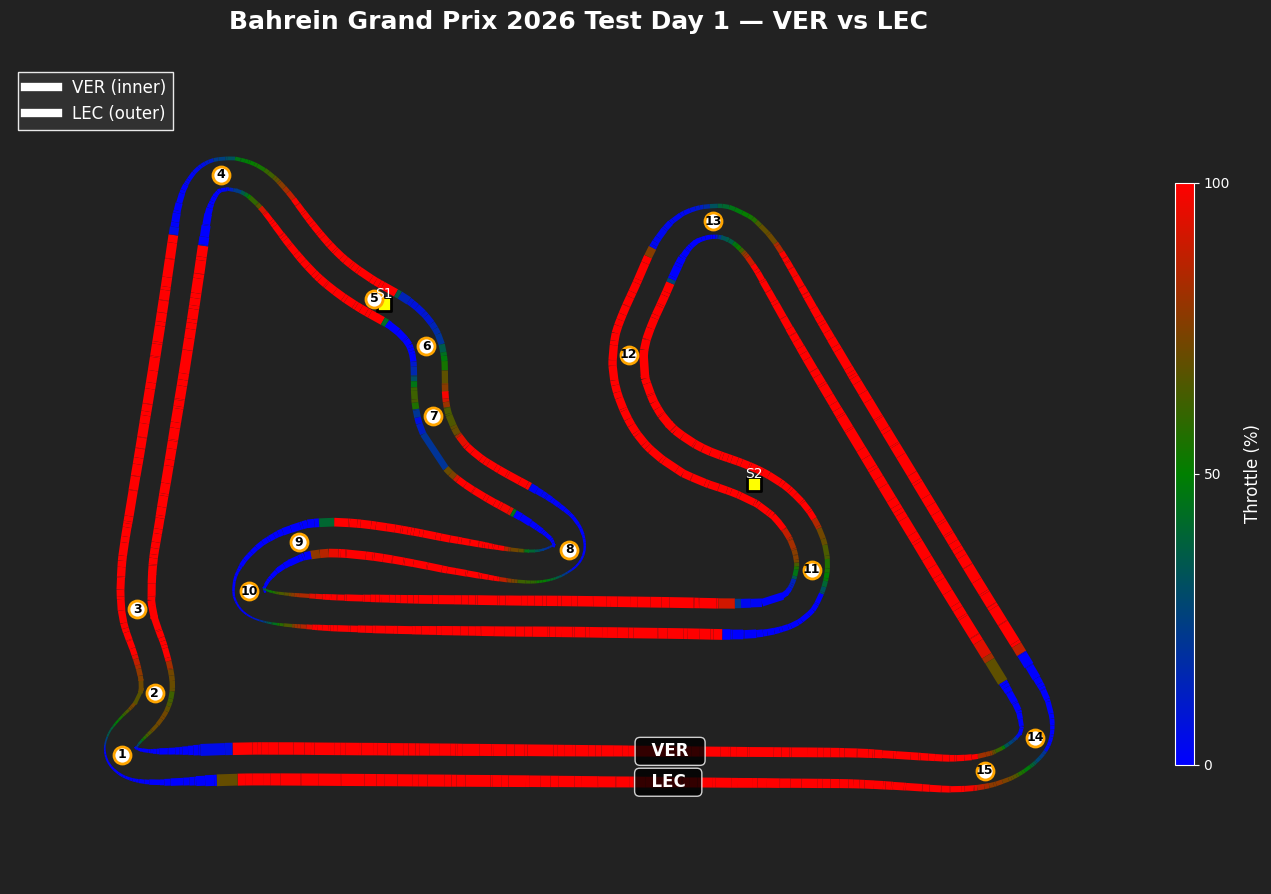

In [12]:
visualizer = f1.dual_throttle_compare.DualThrottleComparisonVisualizer(
    laps=laps,
    circuit_info=session.get_circuit_info(),
    reference_driver='VER',      # Red line
    comparison_driver='LEC',     # Blue line
    offset_distance=200,       # Distance between parallel lines
    event_name=session_name,
    year=session_year,
    session_name=session_type,
    annotate_sectors=True,
)

visualizer.plot()